In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

## Load the data

In [42]:
ss15=pd.read_csv('./School District Finances/SS1300A15.dat', sep='|')
ss15['GEO_ID']=[int(string[-7:]) for string in ss15['GEO_ID']]

In [4]:
ss15.shape

(13428, 46)

In [5]:
ss15.head(2)

,GEOTYPE,ST,GEO_ID,GEO_TTL,FOOTID_GEO,YEAR,SCHENROLL,SCHENROLL_F,SCHSDTOTREV,SCHSDTOTREV_F,...,SCHREVLSPGC,SCHREVLSPGC_F,SCHREVLSCC,SCHREVLSCC_F,SCHREVLSOS,SCHREVLSOS_F,SCHSDREVLSOC,SCHSDREVLSOC_F,SCHREVLSOLR,SCHREVLSOLR_F
0,37,4,400004,"Clarkdale-Jerome Elementary District, Arizona",NaN,2013,455,NaN,3970,NaN,...,0,NaN,370,NaN,0,NaN,132,NaN,358,NaN
1,37,4,400005,"Salome Consolidated Elementary District, Arizona",NaN,2013,99,NaN,1256,NaN,...,0,NaN,8,NaN,0,NaN,1,NaN,21,NaN


In [43]:
ss16=pd.read_csv('./School District Finances/SS1300A16.dat', sep='|')
ss16['GEO_ID']=[int(string[-7:]) for string in ss16['GEO_ID']]

In [7]:
ss16.shape

(13428, 42)

In [44]:
ss17=pd.read_csv('./School District Finances/SS1300A17.dat', sep='|')
ss17['GEO_ID']=[int(string[-7:]) for string in ss17['GEO_ID']]

In [9]:
ss17.shape

(13428, 26)

In [45]:
ss18=pd.read_csv('./School District Finances/SS1300A18.dat', sep='|')
ss18['GEO_ID']=[int(string[-7:]) for string in ss18['GEO_ID']]

In [11]:
ss18.shape

(13428, 30)

In [46]:
grad=pd.read_csv('./School District Finances/Graduation_Rates.csv')
grad.shape

(11325, 24)

## Merging the data

In [47]:
cols_to_use = ss15.columns.difference(ss16.columns)
cols = list(cols_to_use)
cols.append('GEO_ID')

In [48]:
first_two = pd.merge(ss16, ss15[cols], on='GEO_ID')

In [49]:
first_two.head(2)

,GEOTYPE,ST,GEO_ID,GEO_TTL,FOOTID_GEO,YEAR,SCHENROLL,SCHENROLL_F,SCHSDTOTEXP,SCHSDTOTEXP_F,...,SCHSDREVFSDSON,SCHSDREVFSDSON_F,SCHSDREVLS,SCHSDREVLSOC,SCHSDREVLSOC_F,SCHSDREVLS_F,SCHSDREVSSON,SCHSDREVSSON_F,SCHSDTOTREV,SCHSDTOTREV_F
0,37,4,400004,"Clarkdale-Jerome Elementary District, Arizona",NaN,2013,455,NaN,3303,NaN,...,250,NaN,2314,132,NaN,NaN,18,NaN,3970,NaN
1,37,4,400005,"Salome Consolidated Elementary District, Arizona",NaN,2013,99,NaN,1077,NaN,...,17,NaN,968,1,NaN,NaN,4,NaN,1256,NaN


In [50]:
cols_to_use = first_two.columns.difference(ss17.columns)
cols = list(cols_to_use)
cols.append('GEO_ID')

In [51]:
first_three = pd.merge(ss17, first_two[cols], on='GEO_ID')

In [52]:
cols_to_use = first_three.columns.difference(ss18.columns)
cols = list(cols_to_use)
cols.append('GEO_ID')

In [53]:
first_four = pd.merge(ss18, first_three[cols], on='GEO_ID')

In [54]:
first_four.rename(columns={'GEO_ID': 'leaid11'}, inplace=True)

In [55]:
cols_to_use = first_four.columns.difference(grad.columns)
cols = list(cols_to_use)
cols.append('leaid11')

In [56]:
df = pd.merge(grad, first_four[cols], on='leaid11')
df.shape

(10170, 143)

## Final DataFrame

In [23]:
df.head(2)

,STNAM,FIPST,leaid11,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,MAS_RATE_1112,...,SCHSDREVSS_P,SCHSDREVSS_P_F,SCHSDTOTEXP,SCHSDTOTEXP_F,SCHSDTOTREV,SCHSDTOTREV_F,SCHSDTOTREV_P,SCHSDTOTREV_P_F,ST,YEAR
0,ALABAMA,1,100005,Albertville City,268,83,NaN,NaN,NaN,NaN,...,59.4,NaN,38123,NaN,38214,NaN,100.0,NaN,1,2013
1,ALABAMA,1,100006,Marshall County,424,79,2.0,PS,1.0,PS,...,62.0,NaN,53182,NaN,55128,NaN,100.0,NaN,1,2013


## Exploratory Data Analysis

In [57]:
df.dropna(axis=1,inplace=True)

In [58]:
df.shape

(10170, 67)

In [26]:
df.head(2)

,STNAM,FIPST,leaid11,leanm11,ALL_COHORT_1112,ALL_RATE_1112,GEOTYPE,GEO_TTL,SCHENROLL,SCHEXPCO,...,SCHSDREVLSTPGC_P,SCHSDREVLS_P,SCHSDREVSSGFA_P,SCHSDREVSSON,SCHSDREVSS_P,SCHSDTOTEXP,SCHSDTOTREV,SCHSDTOTREV_P,ST,YEAR
0,ALABAMA,1,100005,Albertville City,268,83,37,"Albertville City School District, Alabama",4422,1006,...,9.5,27.4,51.3,1972,59.4,38123,38214,100.0,1,2013
1,ALABAMA,1,100006,Marshall County,424,79,37,"Marshall County School District, Alabama",5700,261,...,11.4,22.5,51.8,3375,62.0,53182,55128,100.0,1,2013


#### From below we can see that when cohorts are greater than 200, the graduation rate is given is a single number, whereas less than 200 is given a range

In [575]:
print(np.unique(df.loc[df['ALL_COHORT_1112']>200, ['ALL_RATE_1112']]))
print(np.unique(df.loc[df['ALL_COHORT_1112']<200, ['ALL_RATE_1112']]))

['18' '20' '27' '30' '31' '36' '37' '40' '41' '42' '43' '44' '45' '46'
 '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60'
 '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73' '74'
 '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87' '88'
 '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' 'GE99']
['20-24' '20-29' '21-39' '25-29' '30-34' '30-39' '35-39' '40-44' '40-49'
 '40-59' '45-49' '50-54' '50-59' '55-59' '60-64' '60-69' '60-79' '65-69'
 '70-74' '70-79' '75-79' '80-84' '80-89' '85-89' '90-94' 'GE50' 'GE80'
 'GE90' 'GE95' 'LE10' 'LE20' 'LE5' 'LT50' 'PS']


In [505]:
df.columns

Index(['STNAM', 'FIPST', 'leaid11', 'leanm11', 'ALL_COHORT_1112',
       'ALL_RATE_1112', 'GEOTYPE', 'GEO_TTL', 'SCHENROLL', 'SCHEXPCO',
       'SCHEXPCSFEB', 'SCHEXPCSFEB_PP', 'SCHEXPCSFSW', 'SCHEXPCSFSW_PP',
       'SCHEXPCSIEB', 'SCHEXPCSIEB_PP', 'SCHEXPCSISW', 'SCHEXPCSISW_PP',
       'SCHEXPCSIT', 'SCHEXPCSIT_PP', 'SCHEXPCSOF', 'SCHEXPCSSGA',
       'SCHEXPCSSGA_PP', 'SCHEXPCSSIS', 'SCHEXPCSSIS_PP', 'SCHEXPCSSPS',
       'SCHEXPCSSPS_PP', 'SCHEXPCSSSA', 'SCHEXPCSSSA_PP', 'SCHEXPCSST',
       'SCHEXPCSST_PP', 'SCHEXPCS_PP', 'SCHEXPOID', 'SCHREVFS', 'SCHREVFSDSCN',
       'SCHREVFSDSSE', 'SCHREVFSDSTIT', 'SCHREVLSCC', 'SCHREVLSOLR',
       'SCHREVLSOS', 'SCHREVLSPGC', 'SCHREVLSPT', 'SCHREVLSTT', 'SCHREVSS',
       'SCHREVSSGFA', 'SCHREVSSSE', 'SCHREVSSTP', 'SCHSDEXPCS',
       'SCHSDEXPCSSON', 'SCHSDEXPOPG', 'SCHSDREVFSDSON', 'SCHSDREVFSDSTIT_P',
       'SCHSDREVFS_P', 'SCHSDREVLS', 'SCHSDREVLSC_P', 'SCHSDREVLSNLG_P',
       'SCHSDREVLSOC', 'SCHSDREVLSTPGC_P', 'SCHSDREVLS_P', 'SCHSD

## Exploring the Graduation Rate
#### The graduation rate columns has ranges and non-numeric character

In [518]:
df['ALL_RATE_1112'].unique()

array(['83', '79', '91', '70-74', '90-94', '93', '78', '75-79', '65',
       '87', '63', '88', '81', '74', '60-64', '40', '80', '56', '85-89',
       '66', '76', '67', '89', '80-84', '71', '65-69', '85', '82', '72',
       '84', '92', '75', '70', '77', '70-79', '86', '80-89', '68', '64',
       '98', '94', 'GE95', '90', '69', '58', '73', '55-59', '97', '44',
       '40-44', '30-39', '50-59', '60-79', 'PS', 'GE80', '40-49', '60-69',
       'GE50', '40-59', '27', '50-54', 'LT50', 'LE20', '35-39', '95',
       '21-39', '47', 'LE5', 'GE90', '96', '57', '59', 'GE99', '48',
       '25-29', '52', '20', '42', '30-34', '61', '62', '20-24', '54',
       '51', '45-49', '60', '55', '49', '53', '41', '18', '37', '50',
       '45', '30', '46', '20-29', '36', '31', '43', 'LE10'], dtype=object)

In [59]:
# Remove all observations that the graduation rate is not given
df[df['ALL_RATE_1112']=='PS'].shape[0] #139

139

In [60]:
no_grade_rate=df.index[df['ALL_RATE_1112']=='PS']

df.drop(no_grade_rate,inplace=True)

df.shape

(10031, 67)

In [62]:
# taking the median for the ranges in the grad-rate 
def grade_rate_values(grade_rate):
    if 'GE' in grade_rate:
        splitting=list(grade_rate.split('GE'))
        no_char= int(splitting[1])
        final=np.median([no_char,100])
            
        return final
    
    elif 'LE' in grade_rate:
        splitting=list(grade_rate.split('LE'))
        no_char= int(splitting[1])
        final=np.median([0,no_char])
        
        return final
    
    elif 'LT' in grade_rate:
        splitting=list(grade_rate.split('LT'))
        no_char= int(splitting[1])
        final=np.median([0,no_char])
        
        return final
        
    elif "-" in grade_rate:
        x=grade_rate.replace("-","")
        l=len(x)/2
        num_1=int(x[0:int(l)])
        num_2=int(x[int(l):])
        median= np.median([num_1,num_2])
        
        return median
        
    else:
        grade_rate=int(grade_rate)
        return grade_rate

In [63]:
df['ALL_RATE_1112']=df['ALL_RATE_1112'].map(grade_rate_values).astype(float)

In [64]:
df.head(2)

,STNAM,FIPST,leaid11,leanm11,ALL_COHORT_1112,ALL_RATE_1112,GEOTYPE,GEO_TTL,SCHENROLL,SCHEXPCO,...,SCHSDREVLSTPGC_P,SCHSDREVLS_P,SCHSDREVSSGFA_P,SCHSDREVSSON,SCHSDREVSS_P,SCHSDTOTEXP,SCHSDTOTREV,SCHSDTOTREV_P,ST,YEAR
0,ALABAMA,1,100005,Albertville City,268,83.0,37,"Albertville City School District, Alabama",4422,1006,...,9.5,27.4,51.3,1972,59.4,38123,38214,100.0,1,2013
1,ALABAMA,1,100006,Marshall County,424,79.0,37,"Marshall County School District, Alabama",5700,261,...,11.4,22.5,51.8,3375,62.0,53182,55128,100.0,1,2013


In [428]:
df['ALL_RATE_1112'].describe()

count    10031.000000
mean        85.299173
std         10.665711
min          2.500000
25%         79.000000
50%         87.000000
75%         92.000000
max         99.500000
Name: ALL_RATE_1112, dtype: float64

#### The graduation rate has low variance as showing in the summary statistics, we can see that 75% percent of graduation rate lies between 80% and 100%

In additin we noticed that when the cohort is greater than 200 the graduation rate was given as a single number instead of range. We would expect a higher model accuracy if we can limit our data to only include schools with with cohort greater than 200.

We will try to see if we can only consider schools with cohort size > 200. So, we will check
1. Percentage of schools with different cohort sizes
2. percentage of total students in each cohort size
3. The effect of different cohort sizes to the mean and standard deviation of the graduation rate

### 1. Percentage of schools with different cohort sizes

In [430]:
total_num_schools=len(df['GEO_TTL'].values) #10031
size_1_15=(df.loc[(df['ALL_COHORT_1112'] >=1) & (df['ALL_COHORT_1112']<=15)].shape[0] * 100 )/ total_num_schools
size_16_30=(df.loc[(df['ALL_COHORT_1112'] >15) & (df['ALL_COHORT_1112']<=30)].shape[0] * 100 )/ total_num_schools
size_31_60=(df.loc[(df['ALL_COHORT_1112'] >30) & (df['ALL_COHORT_1112']<=60)].shape[0] * 100 )/ total_num_schools
size_61_200=(df.loc[(df['ALL_COHORT_1112'] >60) & (df['ALL_COHORT_1112']<=200)].shape[0] * 100 )/ total_num_schools
size_more_than_200=(df.loc[(df['ALL_COHORT_1112'] >200)].shape[0] * 100 )/ total_num_schools

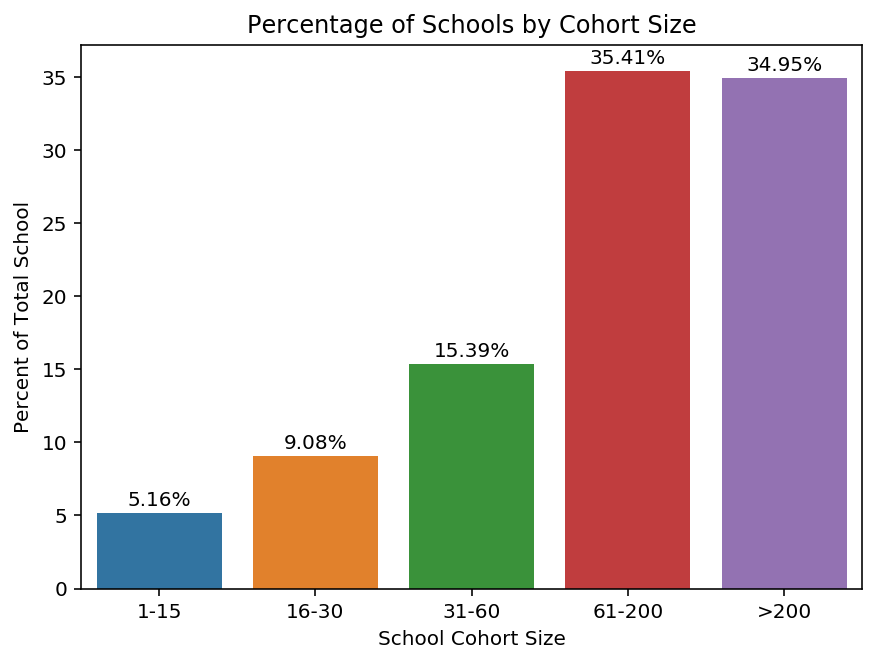

In [431]:
x=['1-15','16-30','31-60','61-200','>200']
y= [size_1_15,size_16_30,size_31_60,size_61_200,size_more_than_200]

fig = plt.figure()
fig, ax = plt.subplots(1, 1)
fig.set_figheight(5)
fig.set_figwidth(7)
ax = sns.barplot(x,y)

ax.set(xlabel='School Cohort Size', ylabel='Percent of Total School',title='Percentage of Schools by Cohort Size')

rounding_y= ['{}%'.format(round(i,2)) for i in y]
zipping= zip(ax.patches, rounding_y) 

for i, j in zipping:
    height =i.get_height()
    x = i.get_x() + i.get_width()/2
    ax.annotate(j, xy = (i.get_x(), i.get_y()), xytext = (x, height + .5), ha='center')

Number of schools with cohort > 200 didn't come in the first place but still the differnce to the first place (cohort 61-200) is slightly low.

### 2. Percentage of total students in each cohort size

In [432]:
total_num_students=df['ALL_COHORT_1112'].sum()
size_1_15=(df.loc[(df['ALL_COHORT_1112'] >=1) & (df['ALL_COHORT_1112']<=15)]['ALL_COHORT_1112'].sum() * 100 )/ total_num_students
size_16_30=(df.loc[(df['ALL_COHORT_1112'] >15) & (df['ALL_COHORT_1112']<=30)]['ALL_COHORT_1112'].sum() * 100 )/ total_num_students
size_31_60=(df.loc[(df['ALL_COHORT_1112'] >30) & (df['ALL_COHORT_1112']<=60)]['ALL_COHORT_1112'].sum() * 100 )/ total_num_students
size_61_200=(df.loc[(df['ALL_COHORT_1112'] >60) & (df['ALL_COHORT_1112']<=200)]['ALL_COHORT_1112'].sum()  * 100 )/ total_num_students
size_more_than_200=(df.loc[(df['ALL_COHORT_1112'] >200)]['ALL_COHORT_1112'].sum() * 100 )/ total_num_students

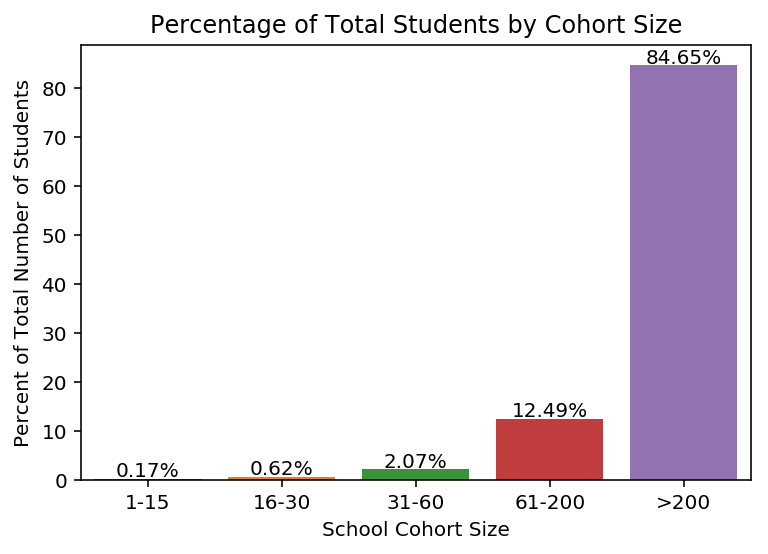

In [434]:
x=['1-15','16-30','31-60','61-200','>200']
y= [size_1_15,size_16_30,size_31_60,size_61_200,size_more_than_200]

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
fig, ax = plt.subplots(1, 1)
ax = sns.barplot(x,y)

ax.set(xlabel='School Cohort Size', ylabel='Percent of Total Number of Students',title='Percentage of Total Students by Cohort Size')

rounding_y= ['{}%'.format(round(i,2)) for i in y]
zipping= zip(ax.patches, rounding_y) 

for i, j in zipping:
    height =i.get_height()
    x = i.get_x() + i.get_width()/2
    ax.annotate(j, xy = (i.get_x(), i.get_y()), xytext = (x, height + .5), ha='center')

The above graph showing that around 85% of the students in cohort size greater than 200 which is a good thing if we want to consider the data for school cohort size greater than 200 students

### 3. The effect of different cohort sizes to the mean and standard deviation of the graduation rate

In [30]:
print ("Table for graduation rate statistics summary considering all cohort sizes")
print (df['ALL_RATE_1112'].describe())
     
print ("Table for graduation rate statistics summary considering school cohort size <= 200")    
print(df.loc[(df['ALL_COHORT_1112'] <=200)]['ALL_RATE_1112'].describe())
       
print ("Table for graduation rate statistics summary considering school cohort size > 200")      
print(df.loc[(df['ALL_COHORT_1112'] > 200)]['ALL_RATE_1112'].describe())

Table for graduation rate statistics summary considering all cohort sizes
count    10031.000000
mean        85.299173
std         10.665711
min          2.500000
25%         79.000000
50%         87.000000
75%         92.000000
max         99.500000
Name: ALL_RATE_1112, dtype: float64
Table for graduation rate statistics summary considering school cohort size <= 200
count    6525.000000
mean       85.940996
std        10.640255
min         2.500000
25%        82.000000
50%        90.000000
75%        92.000000
max        97.500000
Name: ALL_RATE_1112, dtype: float64
Table for graduation rate statistics summary considering school cohort size > 200
count    3506.000000
mean       84.104678
std        10.611565
min        18.000000
25%        78.000000
50%        86.000000
75%        92.000000
max        99.500000
Name: ALL_RATE_1112, dtype: float64


The mean and standard deviation of the graduation rate didn't change much between the three scinarios (all cohort sizes, <=200 , >200) They all are about the same.

This supports the scinario of limiting the data to school cohort size > 200 students. 

After examining the three points above to consider limiting the data to include only cohort sizes > 200, we were confident to proceed with this technique especially when looking at the graduation rate values for cohort size <200 is given in ranges which may weaken our model accuracy. 

We will proceed to build the model to only include cohort size >200.

In [65]:
df._get_numeric_data().columns

Index(['FIPST', 'leaid11', 'ALL_COHORT_1112', 'ALL_RATE_1112', 'GEOTYPE',
       'SCHENROLL', 'SCHEXPCO', 'SCHEXPCSFEB', 'SCHEXPCSFEB_PP', 'SCHEXPCSFSW',
       'SCHEXPCSFSW_PP', 'SCHEXPCSIEB', 'SCHEXPCSIEB_PP', 'SCHEXPCSISW',
       'SCHEXPCSISW_PP', 'SCHEXPCSIT', 'SCHEXPCSIT_PP', 'SCHEXPCSOF',
       'SCHEXPCSSGA', 'SCHEXPCSSGA_PP', 'SCHEXPCSSIS', 'SCHEXPCSSIS_PP',
       'SCHEXPCSSPS', 'SCHEXPCSSPS_PP', 'SCHEXPCSSSA', 'SCHEXPCSSSA_PP',
       'SCHEXPCSST', 'SCHEXPCSST_PP', 'SCHEXPCS_PP', 'SCHEXPOID', 'SCHREVFS',
       'SCHREVFSDSCN', 'SCHREVFSDSSE', 'SCHREVFSDSTIT', 'SCHREVLSCC',
       'SCHREVLSOLR', 'SCHREVLSOS', 'SCHREVLSPGC', 'SCHREVLSPT', 'SCHREVLSTT',
       'SCHREVSS', 'SCHREVSSGFA', 'SCHREVSSSE', 'SCHREVSSTP', 'SCHSDEXPCS',
       'SCHSDEXPCSSON', 'SCHSDEXPOPG', 'SCHSDREVFSDSON', 'SCHSDREVFSDSTIT_P',
       'SCHSDREVFS_P', 'SCHSDREVLS', 'SCHSDREVLSC_P', 'SCHSDREVLSNLG_P',
       'SCHSDREVLSOC', 'SCHSDREVLSTPGC_P', 'SCHSDREVLS_P', 'SCHSDREVSSGFA_P',
       'SCHSDREVSSON', 'S

### Exploratory Analysis of the Reltionship Between Dependent and Independent Variables

In [66]:
df_cohort_greater_200=df.loc[(df['ALL_COHORT_1112']>200)]

In [67]:
df_cohort_greater_200.shape

(3506, 67)

Since our dataset is from the school district finances, our focus is on the spending variables.

Below demonstrated the relationship between different spending variables and the graduation rate. We encountered three types of corrolation:

Positive corrolation as seen in spending for instruction - Salaries and Wages and total instructional spending. <br>
Negative corrolatioon as seen in spending for support services - Instructional Staff and revenue from fedral sources - Child Nutrition <br>
About no correlation as seen in total spending for support services, spending on school adminstration and general adminstration.

#### 1.  Spending for Instruction - Salaries and Wages ( $) Per Pupil

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Spending for Instruction - Salaries and wages ($) Per Pupil'),
 Text(0.5,1,'Spending on Salaries and Wages Vs. Graduation Rate')]

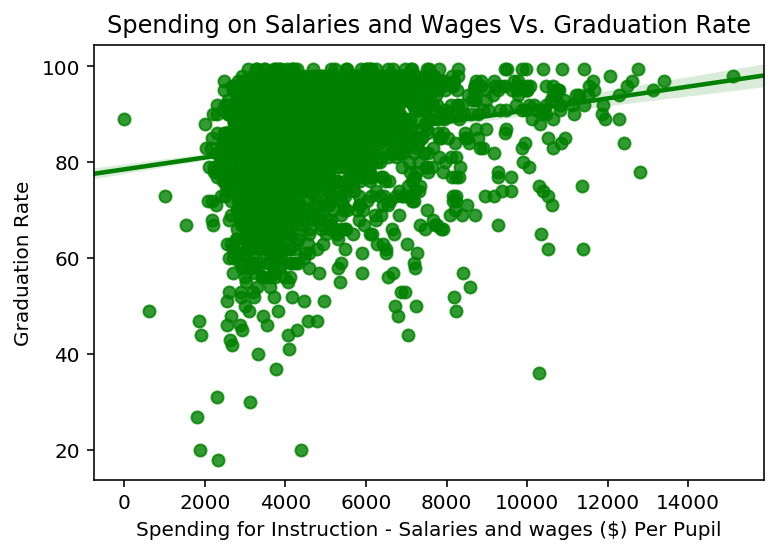

In [442]:
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHEXPCSISW_PP'],y=df_cohort_greater_200['ALL_RATE_1112'],color='g')

ax.set(xlabel="Spending for Instruction - Salaries and wages ($) Per Pupil",
      ylabel="Graduation Rate",
      title='Spending on Salaries and Wages Vs. Graduation Rate')

#### 2. Total Instructional Spending($) Per Pupil

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Total Instructional spending($) Per Pupil'),
 Text(0.5,1,'Total Instructional spending($) Vs. Graduation Rate')]

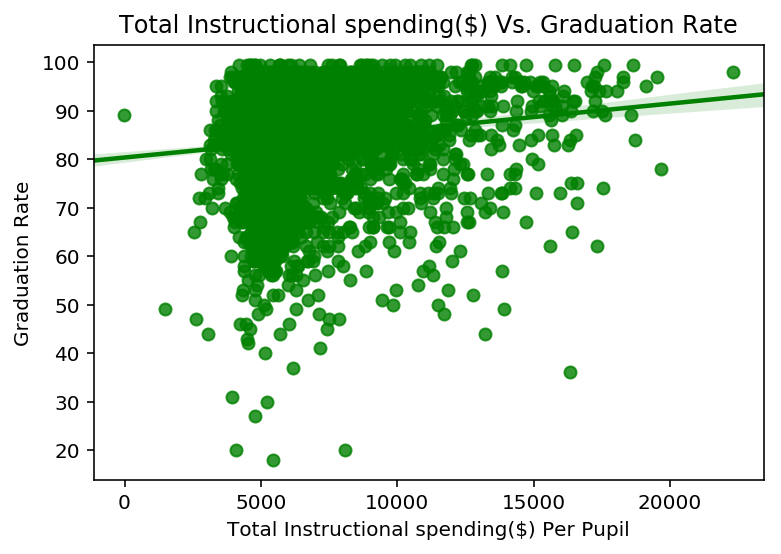

In [444]:
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHEXPCSIT_PP'],y=df_cohort_greater_200['ALL_RATE_1112'],color='g')

ax.set(xlabel="Total Instructional spending($) Per Pupil",
      ylabel="Graduation Rate",
      title='Total Instructional spending($) Vs. Graduation Rate')

#### 3. Spending for Support Services - Instructional Staff Support ($)

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Instructional Staff Support Spending($) Per Pupil'),
 Text(0.5,1,'Instructional Staff Support Spending($) Vs. Graduation Rate')]

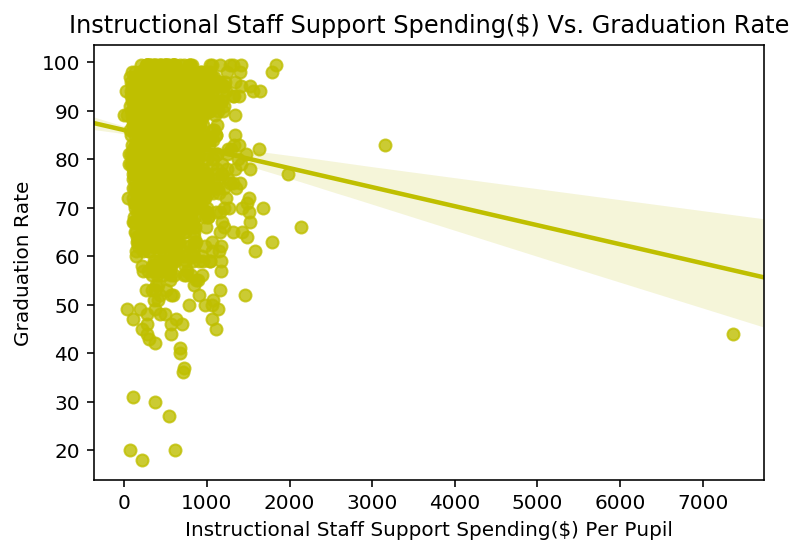

In [445]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHEXPCSSIS_PP'],y=df_cohort_greater_200['ALL_RATE_1112'], color='y')

ax.set(xlabel="Instructional Staff Support Spending($) Per Pupil",
      ylabel="Graduation Rate",
      title='Instructional Staff Support Spending($) Vs. Graduation Rate')

#### 4. Total Spending for Support Services ($)

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Total spending for Support Services($) Per Pupil'),
 Text(0.5,1,'Total Spending for Support Services ($) Vs. Graduation Rate')]

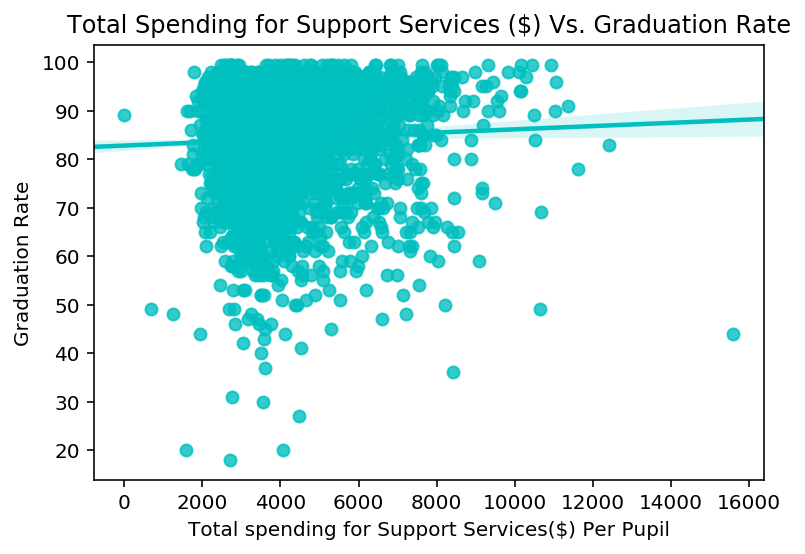

In [446]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHEXPCSST_PP'],y=df_cohort_greater_200['ALL_RATE_1112'], color='c')

ax.set(xlabel="Total spending for Support Services($) Per Pupil",
      ylabel="Graduation Rate",
      title='Total Spending for Support Services ($) Vs. Graduation Rate')

#### 5. Spending for support services - General Administration ($)

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Spending for Support Services- General Administration ($) Per Pupil'),
 Text(0.5,1,'Spending for Support Services- General Administration ($) Vs. Graduation Rate')]

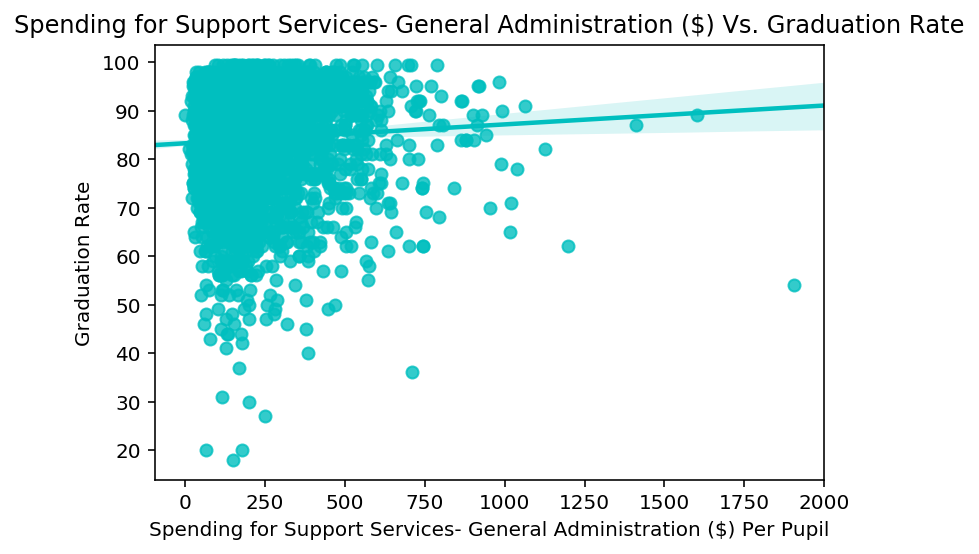

In [447]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHEXPCSSGA_PP'],y=df_cohort_greater_200['ALL_RATE_1112'],color='c')

ax.set(xlabel="Spending for Support Services- General Administration ($) Per Pupil",
      ylabel="Graduation Rate",
      title='Spending for Support Services- General Administration ($) Vs. Graduation Rate')

#### 6. Current Spending for Support Services - School Administration ($)

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Current Spending for Support Services - School Administration  ($) Per Pupil'),
 Text(0.5,1,'Current Spending for Support Services - School Administration ($) Vs. Graduation Rate')]

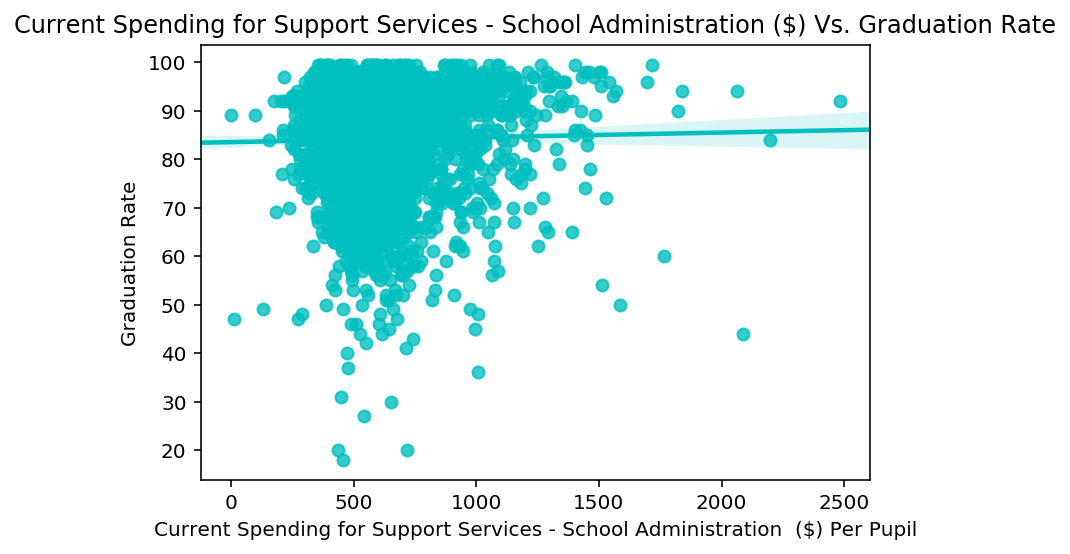

In [448]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHEXPCSSSA_PP'],y=df_cohort_greater_200['ALL_RATE_1112'],color='c')

ax.set(xlabel="Current Spending for Support Services - School Administration  ($) Per Pupil",
      ylabel="Graduation Rate",
      title='Current Spending for Support Services - School Administration ($) Vs. Graduation Rate')

#### 7. Revenue from federal sources - Child Nutrition ($1,000)

We can assume that schools with nutrition programs funded by federal sources may have higher graduation rate. However, the graph below shows that they are negatively correlated.

[Text(0,0.5,'Graduation Rate'),
 Text(0.5,0,'Revenue from federal sources - Child Nutrition ($)'),
 Text(0.5,1,'Revenue from federal sources - Child Nutrition Vs. Graduation Rate')]

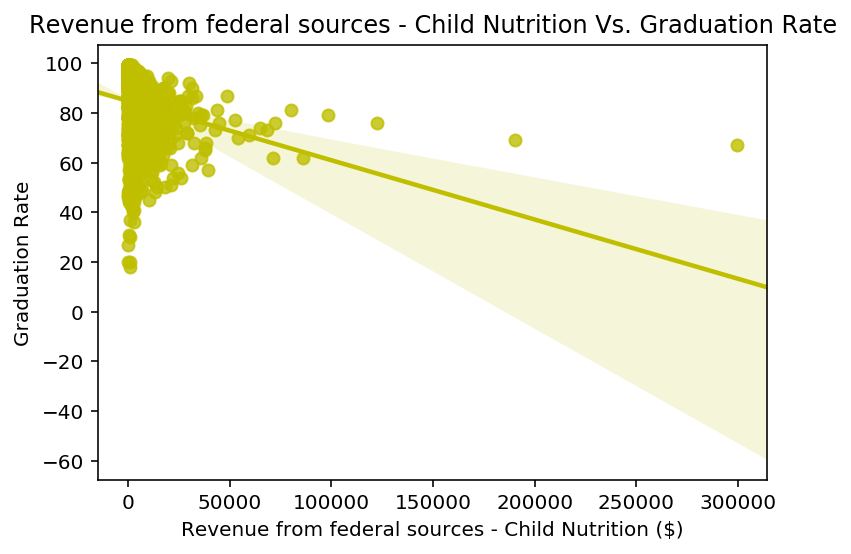

In [449]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(1,1)
ax= sns.regplot(x=df_cohort_greater_200['SCHREVFSDSCN'],y=df_cohort_greater_200['ALL_RATE_1112'],color='y')

ax.set(xlabel="Revenue from federal sources - Child Nutrition ($)",
      ylabel="Graduation Rate",
      title='Revenue from federal sources - Child Nutrition Vs. Graduation Rate')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

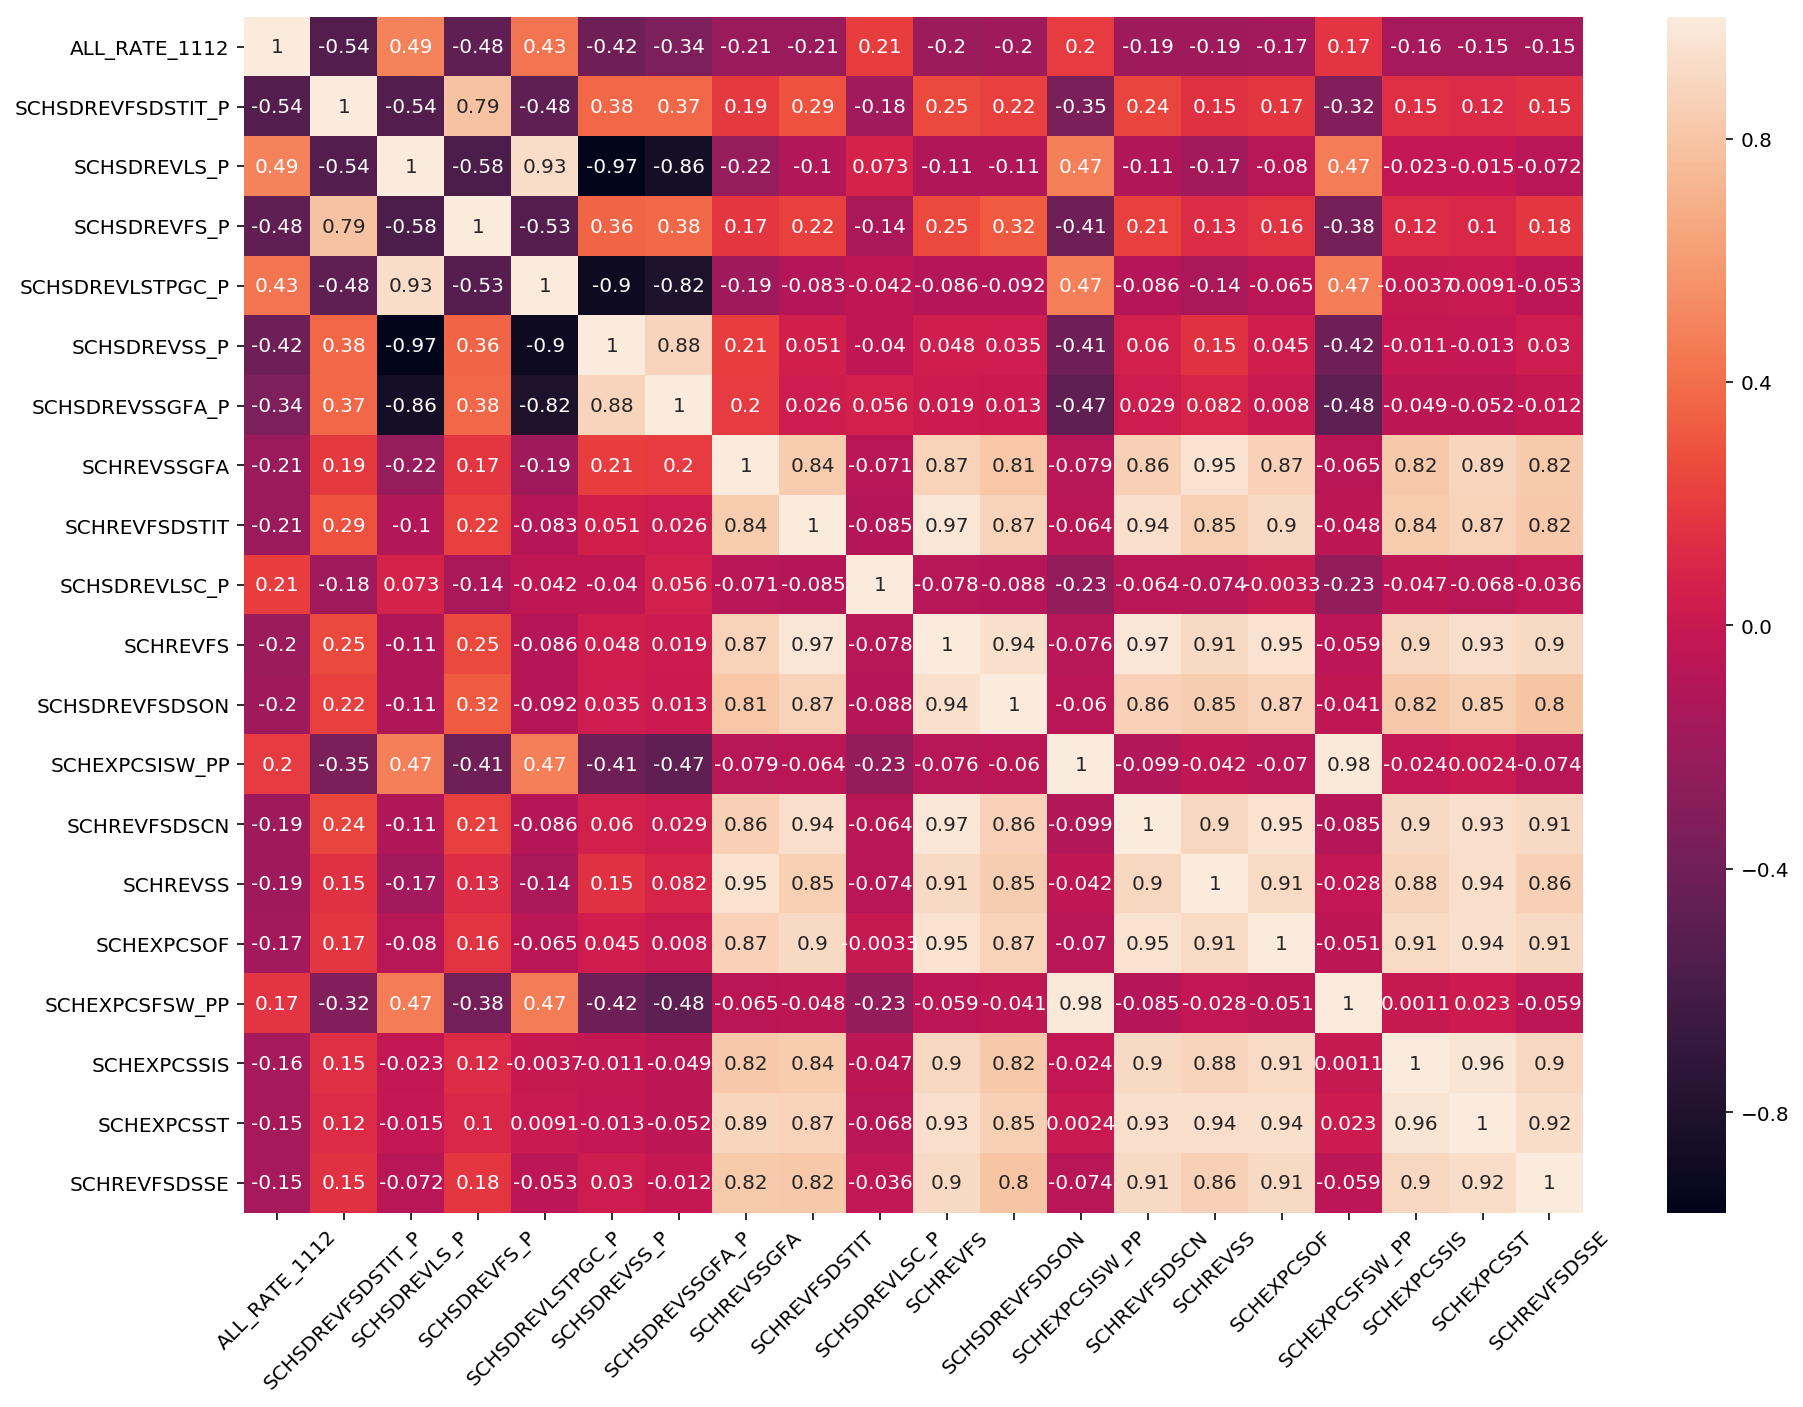

In [40]:
# heatmap of the 20 highest correlation with the target
k = 20 #number of variables for heatmap
cols = df_cohort_greater_200.corr().abs().nlargest(k, 'ALL_RATE_1112')['ALL_RATE_1112'].index
cm = np.corrcoef(df_cohort_greater_200[cols].values.T)
plt.figure(figsize=(15,11))
sns.heatmap(cm, annot=True,xticklabels=cols.values,yticklabels=cols.values)
plt.xticks(rotation=45)

### Building a predictive model

We are going to build a random forest model. First, we will test the model with only numeriacal variables then both numerical and categorical variables. 

As discussed earlier, we will build our model for cohort size >200 and later build another one for cohort >60 to check the if we can generalize our model to different cohort sizes.

The model that included both numerical and categorical got a highrt R-squared value.

### Model With Only Numerical Variables

In [87]:
numerical_col=df_cohort_greater_200._get_numeric_data().columns
print(len(numerical_col))
numerical_col=['FIPST', 'leaid11', 'ALL_COHORT_1112', 'GEOTYPE',
       'SCHENROLL', 'SCHEXPCO', 'SCHEXPCSFEB', 'SCHEXPCSFEB_PP', 'SCHEXPCSFSW',
       'SCHEXPCSFSW_PP', 'SCHEXPCSIEB', 'SCHEXPCSIEB_PP', 'SCHEXPCSISW',
       'SCHEXPCSISW_PP', 'SCHEXPCSIT', 'SCHEXPCSIT_PP', 'SCHEXPCSOF',
       'SCHEXPCSSGA', 'SCHEXPCSSGA_PP', 'SCHEXPCSSIS', 'SCHEXPCSSIS_PP',
       'SCHEXPCSSPS', 'SCHEXPCSSPS_PP', 'SCHEXPCSSSA', 'SCHEXPCSSSA_PP',
       'SCHEXPCSST', 'SCHEXPCSST_PP', 'SCHEXPCS_PP', 'SCHEXPOID', 'SCHREVFS',
       'SCHREVFSDSCN', 'SCHREVFSDSSE', 'SCHREVFSDSTIT', 'SCHREVLSCC',
       'SCHREVLSOLR', 'SCHREVLSOS', 'SCHREVLSPGC', 'SCHREVLSPT', 'SCHREVLSTT',
       'SCHREVSS', 'SCHREVSSGFA', 'SCHREVSSSE', 'SCHREVSSTP', 'SCHSDEXPCS',
       'SCHSDEXPCSSON', 'SCHSDEXPOPG', 'SCHSDREVFSDSON', 'SCHSDREVFSDSTIT_P',
       'SCHSDREVFS_P', 'SCHSDREVLS', 'SCHSDREVLSC_P', 'SCHSDREVLSNLG_P',
       'SCHSDREVLSOC', 'SCHSDREVLSTPGC_P', 'SCHSDREVLS_P', 'SCHSDREVSSGFA_P',
       'SCHSDREVSSON', 'SCHSDREVSS_P', 'SCHSDTOTEXP', 'SCHSDTOTREV',
       'SCHSDTOTREV_P', 'ST', 'YEAR']

64


In [88]:
df_cohort_greater_200[numerical_col].shape

(3506, 63)

In [89]:
X=df_cohort_greater_200[numerical_col]
y=df_cohort_greater_200['ALL_RATE_1112']

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [91]:
rf_params = {
             'n_estimators':[5,10,20,50],
             'min_samples_split':[2,5,10,20],
             'max_features':['auto','log2', .5,.7,1.0],
             'max_depth':[None, 3,5,10]
}

rf_gs = GridSearchCV(RandomForestRegressor(), rf_params, verbose=1, n_jobs=-1)

rf_gs.fit(X_train, y_train)

print(rf_gs.best_score_)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 559 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.3min finished


0.5874488545961526


In [92]:
rf_gs.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 5,
 'n_estimators': 50}

In [93]:
rf_gs.score(X_test,y_test)

0.6528002642380467

### Random Forest Model With Categorical and Numerical Variables

In [94]:
categorical_col=df_cohort_greater_200.select_dtypes(include=['object']).columns

In [95]:
df_cohort_greater_200_all_columns=pd.concat([df_cohort_greater_200['STNAM'], df_cohort_greater_200[numerical_col]],axis=1)
df_cohort_greater_200_all_columns.shape

(3506, 64)

In [96]:
df_cohort_greater_200_dum= pd.get_dummies(data=df_cohort_greater_200_all_columns)

In [97]:
df_cohort_greater_200_dum.shape

(3506, 111)

In [98]:
X=df_cohort_greater_200_dum
y=df_cohort_greater_200['ALL_RATE_1112']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [100]:
rf_params = {
             'n_estimators':[50,100,300],
             'min_samples_split':[2,5,10,20],
             'max_features':['auto','log2', .5,.7,1.0],
             'max_depth':[None, 3,5,10]
}

rf_gs = GridSearchCV(RandomForestRegressor(), rf_params, verbose=1, n_jobs=-1)

rf_gs.fit(X_train, y_train)

print(rf_gs.best_score_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 12.6min finished


0.6056880910627814


In [101]:
rf_gs.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [102]:
rf_gs.score(X_test,y_test)

0.6698808694215102

### Print out the "feature importances" of Random Forest Model with all columns included

[Text(0,0.5,'Features'),
 Text(0.5,0,'Importance Percentage to the Graduation Rate'),
 Text(0.5,1,'The First 20 Important Features fo Cihort size >200')]

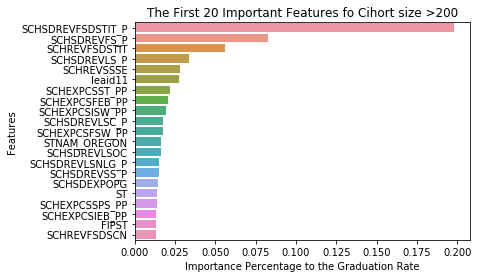

In [103]:
best_features = pd.DataFrame({
        'features':X_train.columns,
        'importance': rf_gs.best_estimator_.feature_importances_
})

best_features.sort_values('importance', ascending=False, inplace=True)

# Plotting a graph for the most important features
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
fig, ax = plt.subplots(1, 1)
ax = sns.barplot(x='importance',y='features', data=best_features[0:21])
ax.set(xlabel= 'Importance Percentage to the Graduation Rate', ylabel='Features',
       title=  "The First 20 Important Features fo Cihort size >200")

In [104]:
list(best_features[0:17]['features'])

['SCHSDREVFSDSTIT_P',
 'SCHSDREVFS_P',
 'SCHREVFSDSTIT',
 'SCHSDREVLS_P',
 'SCHREVSSSE',
 'leaid11',
 'SCHEXPCSST_PP',
 'SCHEXPCSFEB_PP',
 'SCHEXPCSISW_PP',
 'SCHSDREVLSC_P',
 'SCHEXPCSFSW_PP',
 'STNAM_OREGON',
 'SCHSDREVLSOC',
 'SCHSDREVLSNLG_P',
 'SCHSDREVSS_P',
 'SCHSDEXPOPG',
 'ST']

### Model Comments (Categorical and Numerical Features):

Based on the model above we got a R-squared score 60% on the trained data and 67% for the testing data with 65 features. 

Also, after examining the most important features for the model, we noticed that revenues from federal sources were at the top of the list.

I will try to use the following features in my model and recheck the accuracy score again to see if I can still explain the variation on the dependent variables with less features included. 

1. Revenue from federal sources - Title I (%) 
2. Revenue from federal sources - Total (%) 
3. Revenue from local sources - Total (%) 
4. Revenue from state sources - Special education(\$) 
5. Leaid11- Local education agency district
6. Current spending for selected functions - Support Services - Total (\$) 
7. Current spending for selected objects - Employee benefits ($) 
8. Current spending for selected functions - Instruction - Salaries and wages (\$) 
9. Revenue from local sources - Charges (%) 
10. Revenue from local sources - Charges (\$) 
11. Revenue from local sources - Other local governments (%) 
12. Revenue from state sources - Total (%)
13. Expenditure - Intergovernmental (\$)

### Gradientboosting Model with All Columns Included

In this section, I used gradientboosting model to see how my model will behave differently from random forest.
I got a higher score in the GB, however I will proceed with the RF model because it is more robust to overfitting.

In [474]:
X=df_cohort_greater_200_dum
y=df_cohort_greater_200['ALL_RATE_1112']

In [475]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [476]:
gb = GradientBoostingRegressor()
gb_params = {
    'max_depth': [3, 4],
    'n_estimators': [400,500],
    'max_features':['sqrt',0.5,'log2']
}
gs_gb = GridSearchCV(gb, gb_params)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_score_)

0.6392957263606169


In [477]:
gs_gb.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}

In [478]:
gs_gb.score(X_test,y_test)

0.6585229670235185

[Text(0,0.5,'Features'),
 Text(0.5,0,'Importance Percentage to the Graduation Rate'),
 Text(0.5,1,'The First 20 Important Features fo Cihort size >200')]

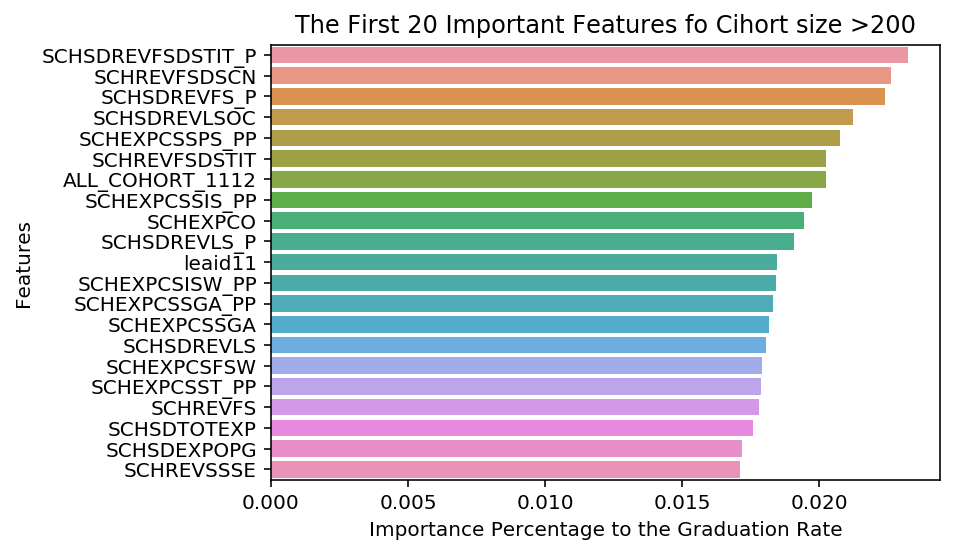

In [479]:
best_features = pd.DataFrame({
        'features':X_train.columns,
        'importance': gs_gb.best_estimator_.feature_importances_
})

best_features.sort_values('importance', ascending=False, inplace=True)

# Plotting a graph for the most important features
fig = plt.figure(figsize=(1000,100))
fig, ax = plt.subplots(1, 1)
ax = sns.barplot(x='importance',y='features', data=best_features[0:21])
ax.set(xlabel= 'Importance Percentage to the Graduation Rate', ylabel='Features',
       title=  "The First 20 Important Features fo Cihort size >200")

### Predictive Model for Cohort > 60 students
We still want to test the model using cohort size > 60 students to see if limiting the data has a huge impact on the model accuracy.

In [105]:
df_cohort_greater_60= df.loc[(df['ALL_COHORT_1112']>60)]
df_cohort_greater_60.shape

(7058, 67)

In [106]:
numerical_col_60=df_cohort_greater_60._get_numeric_data().columns
numerical_col_60=list(numerical_col_60)
numerical_col_60.remove('ALL_RATE_1112')
len(numerical_col_60)

63

In [107]:
df_cohort_greater_60.select_dtypes(include=['object']).columns

Index(['STNAM', 'leanm11', 'GEO_TTL'], dtype='object')

In [111]:
df_cohort_greater_60_all_columns=pd.concat([df_cohort_greater_60['STNAM'], df_cohort_greater_60[numerical_col_60]],axis=1)

df_cohort_greater_60_all_columns.shape

(7058, 64)

In [112]:
df_cohort_greater_60_dum= pd.get_dummies(data=df_cohort_greater_60_all_columns)

In [113]:
df_cohort_greater_60_dum.shape

(7058, 111)

In [114]:
X=df_cohort_greater_60_dum
y=df_cohort_greater_60['ALL_RATE_1112']

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [116]:
rf_params = {
             'n_estimators':[50,100,300],
             'min_samples_split':[2,5,10,20],
             'max_features':['auto','log2', .5,.7,1.0],
             'max_depth':[None, 3,5,10]
}

rf_gs = GridSearchCV(RandomForestRegressor(), rf_params, verbose=1, n_jobs=-1)

rf_gs.fit(X_train, y_train)

print(rf_gs.best_score_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 29.3min finished


0.54782137999419


In [117]:
rf_gs.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [118]:
rf_gs.score(X_test,y_test)

0.6098517178955699

#### Print out the "feature importances" of this best model

[Text(0,0.5,'Features'),
 Text(0.5,0,'Importance Percentage to the Graduation Rate'),
 Text(0.5,1,'The First 20 Important Features for Cohort size > 60')]

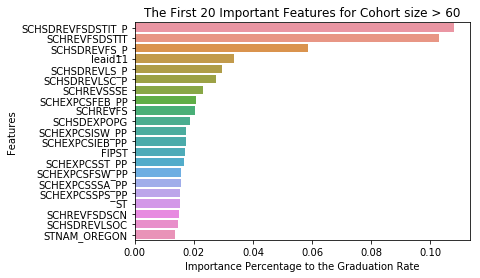

In [119]:
best_features = pd.DataFrame({
        'features':X_train.columns,
        'importance': rf_gs.best_estimator_.feature_importances_
})

best_features.sort_values('importance', ascending=False, inplace=True)

# Plotting a graph for the most important features
fig = plt.figure(figsize=(1000,100))
fig, ax = plt.subplots(1, 1)
ax = sns.barplot(x='importance',y='features', data=best_features[0:21])
ax.set(xlabel= 'Importance Percentage to the Graduation Rate', ylabel='Features',
       title=  "The First 20 Important Features for Cohort size > 60")

### Griedient boosting for cohort> 60

In [176]:
X=df_cohort_greater_60_dum
y=df_cohort_greater_60['ALL_RATE_1112']

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [159]:
gb = GradientBoostingRegressor()
gb_params = {
    'max_depth': [3, 4],
    'n_estimators': [400,500],
    'max_features':['sqrt',0.5,'log2']
}
gs_gb = GridSearchCV(gb, gb_params)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_score_)

0.5779582524720877


In [160]:
gs_gb.best_params_

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}

In [161]:
gs_gb.score(X_test,y_test)

0.6302623763119248

After building a model for school cohort size > 60 students, we saw a relatively close accuracy score to the previous model for cohort size> 200 but we got a bit better score when considering data for only cohort size > 200 because the graduation rate was given as a single number instead of a range.

In addition, the most important features are almost the same and the cohort size features didn't appear at the top list but actually stayed at the same place and that is a good indication to generalize our model when we used data for cohort size > 200 

### Model With the Most important Features From RandomForest For Cohort >200

In this section, we will build a model using the most imoprtant features specified in the section "Model With Categorical and Numerical Variables"

In [142]:
X=df_cohort_greater_200_dum[['SCHSDREVFSDSTIT_P',
 'SCHSDREVFS_P',
 'SCHSDREVLS_P',
 'SCHREVFSDSTIT',
 'SCHREVSSSE',
 'leaid11',
 'SCHEXPCSST_PP',
 'SCHEXPCSFEB_PP',
 'SCHEXPCSISW_PP',
 'SCHSDREVLSC_P',
 'SCHSDREVLSNLG_P',
 'SCHSDREVSS_P',
 'SCHSDEXPOPG', 'ST']]

y=df_cohort_greater_200['ALL_RATE_1112']

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [144]:
rf_params = {
             'n_estimators':[300,400],
             'min_samples_split':[2,5,10,20],
             'max_features':['auto','log2', .5,.7,1.0],
             'max_depth':[None, 3,5,10]
}

rf = GridSearchCV(RandomForestRegressor(), rf_params, verbose=1, n_jobs=-1)

rf.fit(X_train, y_train)

print(rf_gs.best_score_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.0min finished


0.54782137999419


In [145]:
rf.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [146]:
rf.score(X_test,y_test)

0.6572590983925273

### Print out the "feature importances" of this best model

[Text(0,0.5,'Features'),
 Text(0.5,0,'Importance Percentage to the Graduation Rate'),
 Text(0.5,1,'The First 20 Important Features fo Cihort size >200')]

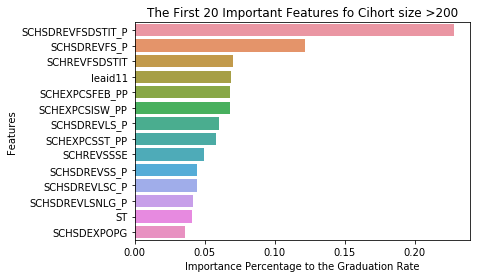

In [147]:
best_features = pd.DataFrame({
        'features':X_train.columns,
        'importance': rf.best_estimator_.feature_importances_
})

best_features.sort_values('importance', ascending=False, inplace=True)

# Plotting a graph for the most important features
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(12)
fig, ax = plt.subplots(1, 1)
ax = sns.barplot(x='importance',y='features', data=best_features[0:21])
ax.set(xlabel= 'Importance Percentage to the Graduation Rate', ylabel='Features',
       title=  "The First 20 Important Features fo Cihort size >200")

### Model Comments (Most Important Features- 14 Features)

After narrowing down the features to be considered in our model to 14 features, we a good accuracy score (55%) relative of having 111 variables. Also, the validation score is still the same which is a good indication as that our model is able to explain 65% of the variation in the graduation rate. 

Now, if we look at the most important features by this model, we can see that revenues from federal sources stayed at the top of the list.

### The Effect of the variabels

In this section we buils a linear regression model to see the direction of the variables relative to the graduation rate.

In [166]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X=df_cohort_greater_200_dum[['SCHSDREVFSDSTIT_P',
 'SCHSDREVFS_P',
 'SCHSDREVLS_P',
 'SCHREVFSDSTIT',
 'SCHREVSSSE',
 'leaid11',
 'SCHEXPCSST_PP',
 'SCHEXPCSFEB_PP',
 'SCHEXPCSISW_PP',
 'SCHSDREVLSC_P',
 'SCHSDREVLSNLG_P',
 'SCHSDREVSS_P',
 'SCHSDEXPOPG', 'ST']]

y=df_cohort_greater_200['ALL_RATE_1112']

# fit the model
model = lm.fit(X, y)
model.coef_

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([-1.76185666e+00, -1.96317557e-01,  9.81095567e-02, -3.28984732e-05,
       -6.36949718e-05,  7.73423273e-05, -8.67961185e-04, -2.00319422e-03,
        1.51343389e-03,  3.98681812e-01,  6.27842292e-02, -4.34079359e-02,
        3.12258586e-05, -7.68359986e+00])

In [173]:
df_coef=pd.DataFrame(model.coef_, columns=['coef'])
df_coef['features']= ['SCHSDREVFSDSTIT_P',
 'SCHSDREVFS_P',
 'SCHSDREVLS_P',
 'SCHREVFSDSTIT',
 'SCHREVSSSE',
 'leaid11',
 'SCHEXPCSST_PP',
 'SCHEXPCSFEB_PP',
 'SCHEXPCSISW_PP',
 'SCHSDREVLSC_P',
 'SCHSDREVLSNLG_P',
 'SCHSDREVSS_P',
 'SCHSDEXPOPG', 'ST']

After running linear regression to check the direction of the variables, we got the following results:

Negative Impact:
1. SCHSDREVFSDSTIT_P: Revenue from federal sources - Title I (%)
2. SCHSDREVFS_P:	  Revenue from federal sources - Total (%) [2]
3. SCHREVFSDSTIT:     Revenue from federal sources - Title I (\$1,000)
4. SCHREVSSSE:     	  Revenue from state sources - Special education (\$1,000)
5. SCHEXPCSST_PP:	  Current spending for selected functions - Support Services - Total (\$)
6. SCHEXPCSFEB_PP:    Current spending for selected objects - Employee benefits (\$)
7. SCHSDREVSS_P:   	  Revenue from state sources - Total (%) 

Positive Impact:
1. leaid11:         Local Education Agency	
2. SCHEXPCSISW_PP:	Current spending for selected functions - Instruction - Salaries and wages (\$)
3. SCHSDREVLSC_P:	Revenue from local sources - Charges (%)
4. SCHSDREVLSNLG_P:	Revenue from local sources - Other local governments (%)
5. SCHSDEXPOPG: 	Expenditure - Intergovernmental ($1,000)
6. SCHSDREVLS_P:	  Revenue from local sources - Total (%) 

### How Can We Increase the Graduation Rate?

In [129]:
num_of_graduates=(df_cohort_greater_200['ALL_RATE_1112'] * df_cohort_greater_200_dum['ALL_COHORT_1112']).sum()
total_num_of_students= df_cohort_greater_200_dum['ALL_COHORT_1112'].sum()

current_graduation_rate= num_of_graduates /total_num_of_students

current_graduation_rate

81.39874898151623

In [130]:
features= [
 'SCHSDREVFSDSTIT_P',
 'SCHSDREVFS_P',
 'SCHSDREVLS_P',
 'SCHREVFSDSTIT',
 'SCHREVSSSE',
 'leaid11',
 'SCHEXPCSST_PP',
 'SCHEXPCSFEB_PP',
 'SCHEXPCSISW_PP',
 'SCHSDREVLSC_P',
 'SCHSDREVLSNLG_P',
 'SCHSDREVSS_P',
 'SCHSDEXPOPG', 'ST']

list_features=[]
for j in features:
    predict_dict={}
    for i in np.linspace(-.5,.5,11):
        model_input=X_test[features]
        model_input[j]=X_test[j]*i+X_test[j]
        predictions=rf.predict(model_input)
        predict_dict[i]=np.mean(predictions)
    list_features.append(predict_dict)

In [132]:
change=pd.DataFrame(list_features,index=features).T
change['percent_change']= np.linspace(-.5,.5,11)

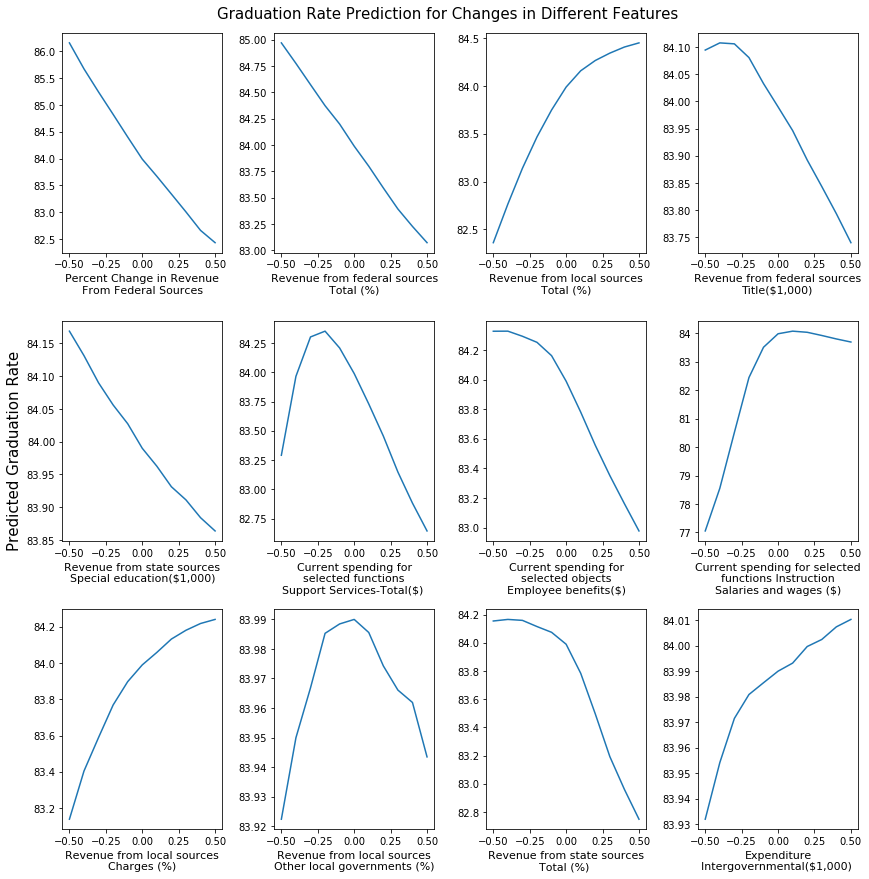

In [163]:
f = plt.figure()
f, ax = plt.subplots(nrows=3, ncols=4)
f.set_figheight(12)
f.set_figwidth(12)
ax[0,0].plot(change['percent_change'],change['SCHSDREVFSDSTIT_P'])
ax[0,0].set_xlabel("Percent Change in Revenue\nFrom Federal Sources", fontsize=11)

ax[0,1].plot(change['percent_change'],change['SCHSDREVFS_P'])
ax[0,1].set_xlabel("Revenue from federal sources\nTotal (%)", fontsize=11)

ax[0,2].plot(change['percent_change'],change['SCHSDREVLS_P'])
ax[0,2].set_xlabel("Revenue from local sources\nTotal (%)",fontsize=11)

ax[0,3].plot(change['percent_change'],change['SCHREVFSDSTIT'])
ax[0,3].set_xlabel("Revenue from federal sources\nTitle($1,000)",fontsize=11)

ax[1,0].plot(change['percent_change'],change['SCHREVSSSE'])
ax[1,0].set_xlabel("Revenue from state sources\nSpecial education($1,000)",fontsize=11)

ax[1,1].plot(change['percent_change'],change['SCHEXPCSST_PP'])
ax[1,1].set_xlabel("Current spending for\nselected functions\nSupport Services-Total($) ",fontsize=11)

ax[1,2].plot(change['percent_change'],change['SCHEXPCSFEB_PP'])
ax[1,2].set_xlabel("Current spending for\nselected objects\nEmployee benefits($)",fontsize=11)

ax[1,3].plot(change['percent_change'],change['SCHEXPCSISW_PP'])
ax[1,3].set_xlabel("Current spending for selected\nfunctions Instruction\nSalaries and wages ($)",fontsize=11)

ax[2,0].plot(change['percent_change'],change['SCHSDREVLSC_P'])
ax[2,0].set_xlabel("Revenue from local sources\nCharges (%)",fontsize=11)

ax[2,1].plot(change['percent_change'],change['SCHSDREVLSNLG_P'])
ax[2,1].set_xlabel("Revenue from local sources\nOther local governments (%)",fontsize=11)

ax[2,2].plot(change['percent_change'],change['SCHSDREVSS_P'])
ax[2,2].set_xlabel("Revenue from state sources\nTotal (%) ",fontsize=11)

ax[2,3].plot(change['percent_change'],change['SCHSDEXPOPG'])
ax[2,3].set_xlabel("Expenditure\nIntergovernmental($1,000) ",fontsize=11)

f.text(0.5, 1, 'Graduation Rate Prediction for Changes in Different Features', ha='center', fontsize=15)
f.text(-.01, 0.5, 'Predicted Graduation Rate', va='center', rotation='vertical', fontsize=15)
plt.tight_layout()

### Conclusion

Reviewing the linear regression coefficients of the variables and their impact on the graduation rate were similar to the charts we plotted above from our model.

* We noticed that the local government had an impact on the graduation rate more the the federal and the state governments.
* We found that money spent on salaries and wages for instruction was the only type of spending that tended to increase graduation rates. The other types tended to decrease them. This makes sense, schools which allocate money to instructions will have a higher graduation rate compared to wasting those resources on other areas like support services.
* Funds that one level of government transfers to another level for school-related spending has an impact of increasing the graduation rate.